# Data Wrangling For Laptop Pricing

In [99]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm import tqdm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [4]:
# Loading the data into the dataframe
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod1.csv")

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      238 non-null    int64  
 1   Manufacturer    238 non-null    object 
 2   Category        238 non-null    int64  
 3   Screen          238 non-null    object 
 4   GPU             238 non-null    int64  
 5   OS              238 non-null    int64  
 6   CPU_core        238 non-null    int64  
 7   Screen_Size_cm  234 non-null    float64
 8   CPU_frequency   238 non-null    float64
 9   RAM_GB          238 non-null    int64  
 10  Storage_GB_SSD  238 non-null    int64  
 11  Weight_kg       233 non-null    float64
 12  Price           238 non-null    int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 24.3+ KB
None


In [6]:
# reading the first 5 rows of the dataframe

df.head(10)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.560,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.624,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.624,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.782,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.624,1.8,8,256,1.91,837
5,5,Dell,3,Full HD,1,1,5,39.624,1.6,8,256,2.20,1016
6,6,HP,3,Full HD,3,1,5,39.624,1.6,8,256,2.10,1117
7,7,Acer,3,IPS Panel,2,1,5,38.100,1.6,4,256,2.20,866
8,8,Dell,3,Full HD,1,1,5,39.624,2.5,4,256,2.30,812
9,9,Acer,3,IPS Panel,3,1,7,38.100,1.8,8,256,2.20,1068


In [7]:
#Rounding up the values in screen_size_cm to the nearest 2 decimal places
df[['Screen_Size_cm']]= np.round(df[['Screen_Size_cm']], 2)

In [8]:
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.60,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.20,634
2,2,Dell,3,Full HD,1,1,7,39.62,2.7,8,256,2.20,946
3,3,Dell,4,IPS Panel,2,1,5,33.78,1.6,8,128,1.22,1244
4,4,HP,4,Full HD,2,1,7,39.62,1.8,8,256,1.91,837


In [9]:
# Evaluating missing data
missing_data = df.isnull()
missing_data.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
# Counting the number of missing data 

for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print('')

Unnamed: 0
Unnamed: 0
False    238
Name: count, dtype: int64

Manufacturer
Manufacturer
False    238
Name: count, dtype: int64

Category
Category
False    238
Name: count, dtype: int64

Screen
Screen
False    238
Name: count, dtype: int64

GPU
GPU
False    238
Name: count, dtype: int64

OS
OS
False    238
Name: count, dtype: int64

CPU_core
CPU_core
False    238
Name: count, dtype: int64

Screen_Size_cm
Screen_Size_cm
False    234
True       4
Name: count, dtype: int64

CPU_frequency
CPU_frequency
False    238
Name: count, dtype: int64

RAM_GB
RAM_GB
False    238
Name: count, dtype: int64

Storage_GB_SSD
Storage_GB_SSD
False    238
Name: count, dtype: int64

Weight_kg
Weight_kg
False    233
True       5
Name: count, dtype: int64

Price
Price
False    238
Name: count, dtype: int64



In [11]:
max_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
max_screen_size

39.62

In [12]:
# calculating the mean of the weight_kg
avg_weight = df['Weight_kg'].astype('float').mean(axis=0)

# Replacing the missing values in weight_kg with mean
df['Weight_kg'].replace(np.nan, avg_weight, inplace=True)

In [13]:
# finding the screen with the most frequency 
max_screen_size = df['Screen_Size_cm'].value_counts().idxmax()
# Replacing the missing values in screen_size_cm with the most frequency

df['Screen_Size_cm'].replace(np.nan, max_screen_size, inplace=True)

In [14]:
df.dtypes

Unnamed: 0          int64
Manufacturer       object
Category            int64
Screen             object
GPU                 int64
OS                  int64
CPU_core            int64
Screen_Size_cm    float64
CPU_frequency     float64
RAM_GB              int64
Storage_GB_SSD      int64
Weight_kg         float64
Price               int64
dtype: object

In [15]:
df.head(2)

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_cm,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_kg,Price
0,0,Acer,4,IPS Panel,2,1,5,35.56,1.6,8,256,1.6,978
1,1,Dell,3,Full HD,1,1,3,39.62,2.0,4,256,2.2,634


In [16]:
# converting the 
df['Screen_Size_cm'] = df['Screen_Size_cm']/2.54
df.rename(columns={'Screen_Size_cm': 'Screen_Size_inch'}, inplace=True)

df['Weight_kg'] = df['Weight_kg']*2.205
df.rename(columns={'Weight_kg':'Weight_pounds'}, inplace=True)

In [17]:
# Looking at the unique values in the data
df.nunique()

Unnamed: 0          238
Manufacturer         11
Category              5
Screen                2
GPU                   3
OS                    2
CPU_core              3
Screen_Size_inch      9
CPU_frequency        11
RAM_GB                5
Storage_GB_SSD        2
Weight_pounds        78
Price               193
dtype: int64

In [18]:
# Normalizing the CPU_frequency 
df['CPU_frequency'] = df['CPU_frequency']/df['CPU_frequency'].max()

In [19]:
# Grouping the price into 3 Bins
bins = np.linspace(min(df['Price']), max(df['Price']), 4)


In [20]:
# Setting the group name
grouped_named = ['Low', 'Medium', "High"]

In [21]:
bins

array([ 527.        , 1621.33333333, 2715.66666667, 3810.        ])

In [22]:
# Applying cut function to determine what each value of df['price'] belongs to

df['Price-binned'] = pd.cut(df['Price'], bins, labels=grouped_named, include_lowest=True)
df[['Price-binned', 'Price']]

,Price-binned,Price
0,Low,978
1,Low,634
2,Low,946
3,Low,1244
4,Low,837
...,...,...
233,Medium,1891
234,Medium,1950
235,Medium,2236
236,Low,883


In [23]:
# finding the hgest price and the group it falls into

df[['Price-binned', 'Price']].max()

Price-binned    High
Price           3810
dtype: object

Text(0, 0.5, 'count')

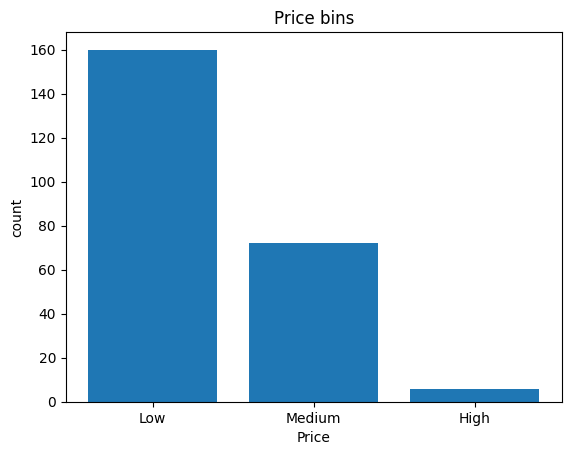

In [24]:
#plotting a bar to see the distribution of each bin

plt.bar(grouped_named, df['Price-binned'].value_counts())

plt.title('Price bins')
plt.xlabel("Price")
plt.ylabel("count")

In [25]:
# displaying the top 5 rows of the data
df.head()

,Unnamed: 0,Manufacturer,Category,Screen,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned
0,0,Acer,4,IPS Panel,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low
1,1,Dell,3,Full HD,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low
2,2,Dell,3,Full HD,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low
3,3,Dell,4,IPS Panel,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low
4,4,HP,4,Full HD,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low


In [26]:
# converting the screen attribute into indicator variable

dummy_variable = pd.get_dummies(df['Screen'])

In [27]:
# displaying the top 5 rows of the dataset
dummy_variable.head()

,Full HD,IPS Panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [28]:
# Renaming the names of the column

dummy_variable= dummy_variable.rename(columns={'Full HD':'Screen-Full_HD', 'IPS Panel':'Screen-IPS_panel'})
dummy_variable.head()

,Screen-Full_HD,Screen-IPS_panel
0,False,True
1,True,False
2,True,False
3,False,True
4,True,False


In [29]:
# Adding the dummy variable to the data (df)

df = pd.concat([df, dummy_variable], axis=1)

In [30]:
# dropping the screen column

df.drop(["Screen"], axis=1, inplace=True )

In [31]:
#displaying the top 5 rows of the data to see the new changes

df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline



In [33]:
df.corr(numeric_only=True)

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
Unnamed: 0,1.000000,0.028451,0.022852,-0.092529,-0.037261,-0.153629,0.424423,0.089017,-0.124216,-0.153316,0.321933,0.062944,-0.062944
Category,0.028451,1.000000,-0.114174,-0.043378,0.232425,-0.285397,-0.053414,0.030127,0.038246,-0.381032,0.286243,-0.117608,0.117608
GPU,0.022852,-0.114174,1.000000,-0.199549,0.145388,0.154366,0.291439,0.218973,0.094288,0.262853,0.288298,-0.089582,0.089582
OS,-0.092529,-0.043378,-0.199549,1.000000,0.016954,0.146614,0.050407,-0.074625,0.007751,0.120858,-0.221730,0.172891,-0.172891
CPU_core,-0.037261,0.232425,0.145388,0.016954,1.000000,0.041123,0.242722,0.473075,0.400015,0.068599,0.459398,0.003837,-0.003837
Screen_Size_inch,-0.153629,-0.285397,0.154366,0.146614,0.041123,1.000000,-0.000955,0.018237,0.119746,0.797605,-0.110565,0.342639,-0.342639
CPU_frequency,0.424423,-0.053414,0.291439,0.050407,0.242722,-0.000955,1.000000,0.226736,0.035557,0.066522,0.366666,0.055273,-0.055273
RAM_GB,0.089017,0.030127,0.218973,-0.074625,0.473075,0.018237,0.226736,1.000000,0.361469,0.055068,0.549297,0.017913,-0.017913
Storage_GB_SSD,-0.124216,0.038246,0.094288,0.007751,0.400015,0.119746,0.035557,0.361469,1.000000,0.112519,0.243421,0.061402,-0.061402
Weight_pounds,-0.153316,-0.381032,0.262853,0.120858,0.068599,0.797605,0.066522,0.055068,0.112519,1.000000,-0.050312,0.117909,-0.117909


(0.0, 3974.15)

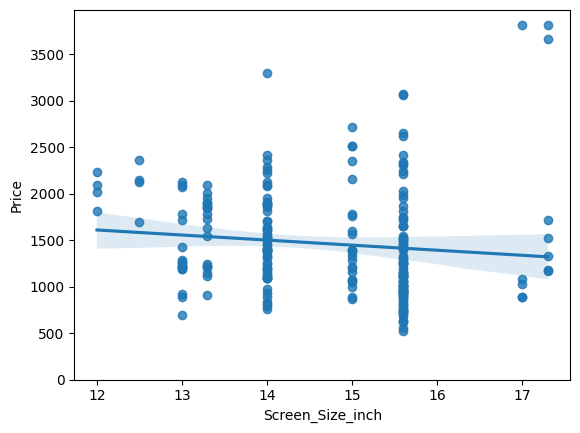

In [34]:
sns.regplot(x='Screen_Size_inch', y='Price', data=df)
plt.ylim(0,)

(0.0, 3974.15)

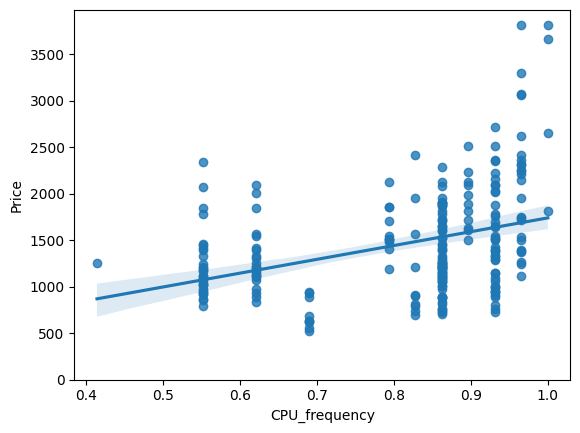

In [35]:
sns.regplot(x='CPU_frequency', y='Price', data=df)
plt.ylim(0,)

(0.0, 3974.15)

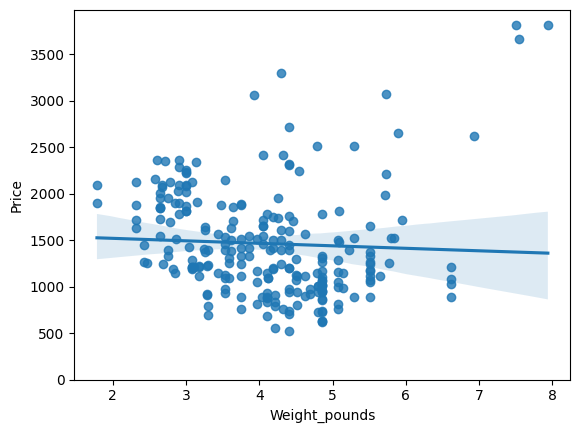

In [36]:
sns.regplot(x='Weight_pounds', y='Price', data=df)
plt.ylim(0,)

In [37]:
# Correlation of the attributes with price

for param in ['Screen_Size_inch','CPU_frequency', 'Weight_pounds' ]:
    print(f'the correlation coefficient of {param} is', df[[param, 'Price']].corr())

the correlation coefficient of Screen_Size_inch is                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110565
Price                    -0.110565  1.000000
the correlation coefficient of CPU_frequency is                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
the correlation coefficient of Weight_pounds is                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000


In [38]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


<Axes: xlabel='Category', ylabel='Price'>

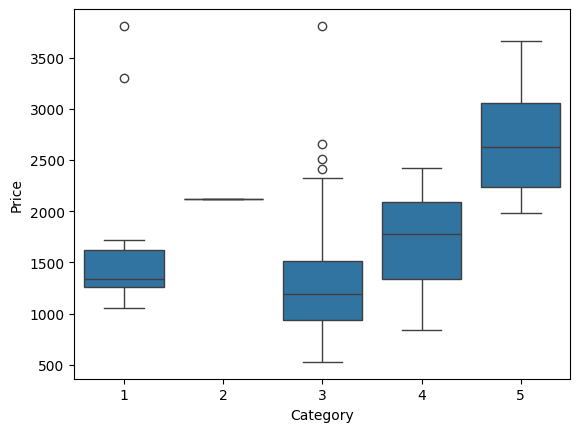

In [39]:
# category box plot

sns.boxplot(x='Category', y='Price', data=df)

<Axes: xlabel='GPU', ylabel='Price'>

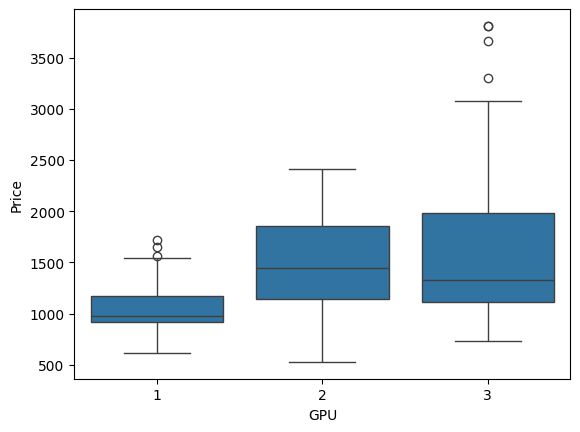

In [40]:
# GPU box plot

sns.boxplot(x='GPU', y='Price', data=df)

<Axes: xlabel='OS', ylabel='Price'>

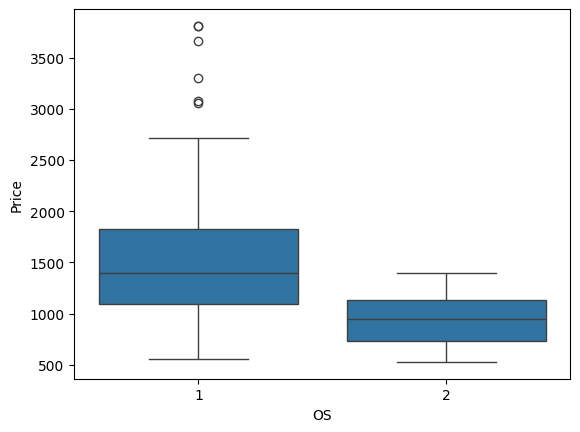

In [41]:
# OS box plot

sns.boxplot(x='OS', y='Price', data=df)

<Axes: xlabel='CPU_core', ylabel='Price'>

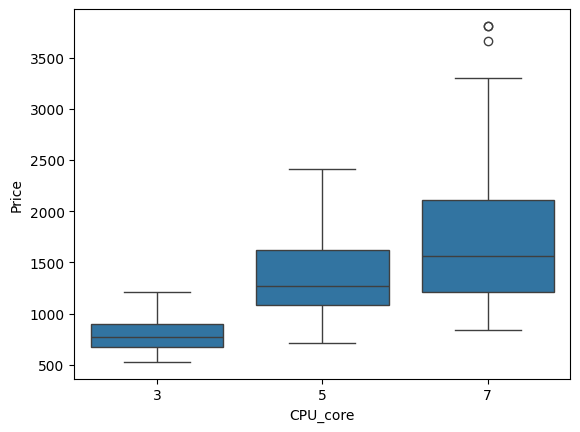

In [42]:
# CPU_core box plot

sns.boxplot(x='CPU_core', y='Price', data=df)

<Axes: xlabel='RAM_GB', ylabel='Price'>

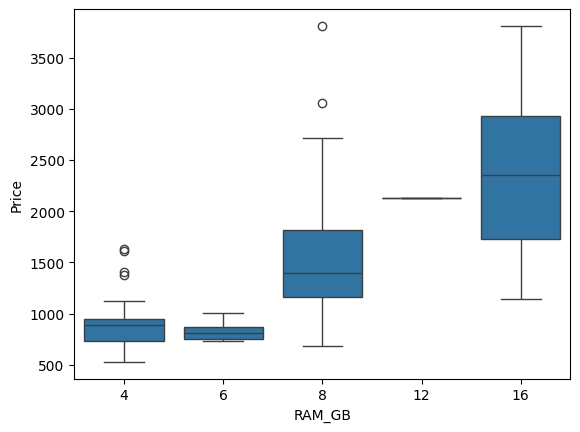

In [43]:
# RAM_GB box plot

sns.boxplot(x='RAM_GB', y= 'Price', data =df)

<Axes: xlabel='Storage_GB_SSD', ylabel='Price'>

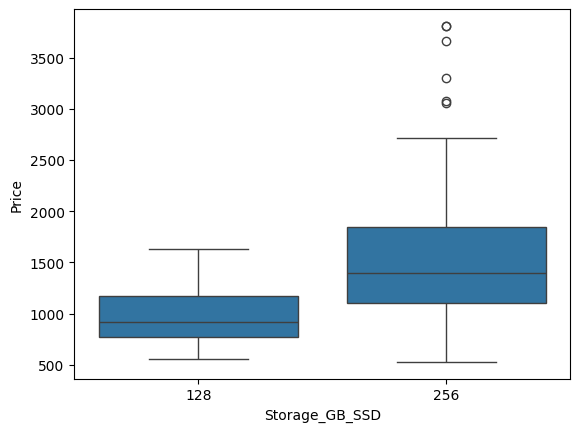

In [44]:
# Storage_GB_SSD box plot

sns.boxplot(x='Storage_GB_SSD', y= 'Price', data =df)

In [45]:
# Descriptive Statistical Analysis
df.describe()

,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,3.205882,2.151261,1.058824,5.630252,14.687951,0.813822,7.882353,245.781513,4.106221,1462.344538
std,68.848868,0.776533,0.638282,0.235790,1.241787,1.165589,0.141860,2.482603,34.765316,1.078442,574.607699
min,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000
25%,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000
50%,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000
75%,177.750000,4.000000,3.000000,1.000000,7.000000,15.598425,0.931034,8.000000,256.000000,4.851000,1777.000000
max,237.000000,5.000000,3.000000,2.000000,7.000000,17.299213,1.000000,16.000000,256.000000,7.938000,3810.000000


In [46]:
#descriptive Statistical analysis including object
df.describe(include=['object'])

,Manufacturer
count,238
unique,11
top,Dell
freq,71


In [47]:
# Grouping GPU, CPU_core and prive to make a pivot table
df_gptest1= df[['GPU', 'CPU_core', 'Price']]

df_gptest = df_gptest1.groupby(["GPU", "CPU_core"], as_index=False).mean()

In [48]:
df_gptest

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [49]:
# making a pivot table
grouped_pivot = df_gptest.pivot(index = 'GPU', columns='CPU_core')
grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

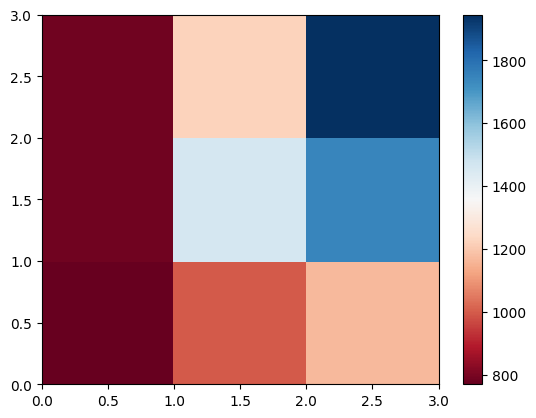

In [50]:
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

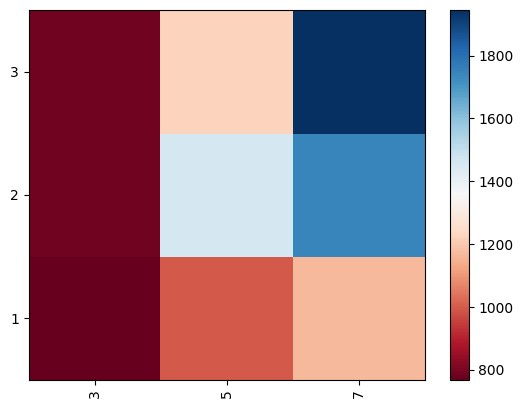

In [51]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

In [52]:
#Pearson Correlation and P_values of the parameters above
for param in ['Screen_Size_inch', 'CPU_frequency', 'Weight_pounds', 'Category','GPU', 'OS', 'CPU_core', 'RAM_GB','Storage_GB_SSD']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print('The pearson correlation coefficient of', param,'is', pearson_coef, 'with a P_value of P=',p_value )

Screen_Size_inch
The pearson correlation coefficient of Screen_Size_inch is -0.11056471275425062 with a P_value of P= 0.08876456732700777
CPU_frequency
The pearson correlation coefficient of CPU_frequency is 0.366665558925886 with a P_value of P= 5.5024633507134225e-09
Weight_pounds
The pearson correlation coefficient of Weight_pounds is -0.05031225837751547 with a P_value of P= 0.43976938534338944
Category
The pearson correlation coefficient of Category is 0.28624275581264125 with a P_value of P= 7.225696235806733e-06
GPU
The pearson correlation coefficient of GPU is 0.2882981988881428 with a P_value of P= 6.166949698364282e-06
OS
The pearson correlation coefficient of OS is -0.22172980114827384 with a P_value of P= 0.0005696642559246749
CPU_core
The pearson correlation coefficient of CPU_core is 0.4593977773355115 with a P_value of P= 7.912950127009034e-14
RAM_GB
The pearson correlation coefficient of RAM_GB is 0.5492972971857844 with a P_value of P= 3.681560628842868e-20
Storage_GB_

In [53]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings("ignore", category=UserWarning) 
%matplotlib inline

In [54]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


In [55]:
# Creating a single feature Linear Regression model that fits the pair of "CPU_frequency" and "Price" to find the model for prediction.

lm = LinearRegression()

X = df[['CPU_frequency']]
Y = df['Price']

lm.fit(X,Y)



LinearRegression()

In [56]:
yhat = lm.predict(X)
yhat[0:5]

array([1073.07834392, 1277.93263722, 1636.42765051, 1073.07834392,
       1175.50549057])

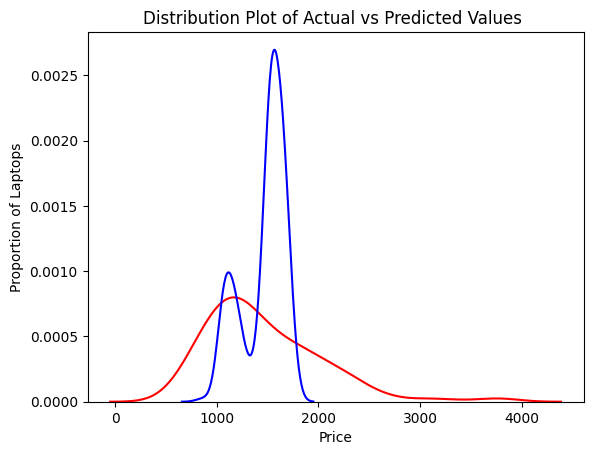

In [57]:
# Creating a distribution plot between a predicted value and actual values



ax1 = sns.distplot(df['Price'], hist=False, color='r', label='Actual Values')
sns.distplot(yhat, hist=False, color='b', label = 'Predicted Values')

plt.title("Distribution Plot of Actual vs Predicted Values ")
plt.xlabel("Price")
plt.ylabel('Proportion of Laptops')
plt.show()

In [58]:
mse_slr = mean_squared_error(Y, yhat)
mse_slr

284583.4405868629

In [59]:
r2_score_slr  = lm.score(X,Y)
r2_score_slr

0.1344436321024326

In [60]:
# Fittin Multiple Paremeters

lm1 = LinearRegression()
Z = df[['CPU_frequency', 'Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD' ]]
Y= df['Price']

lm1.fit(Z,Y)

LinearRegression()

In [61]:
y_hat = lm1.predict(Z)

y_hat[0:5]

array([1345.51622771,  710.44905496, 1552.37242687, 1295.00681012,
       1543.13847022])

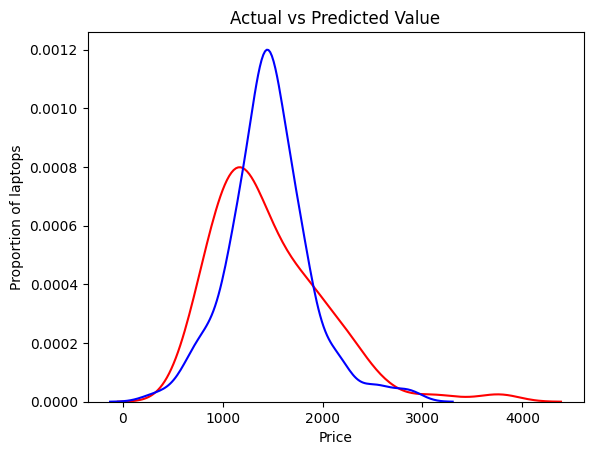

In [62]:
ax2= sns.distplot(df['Price'], hist=False, color='r', label='Actual Value')
sns.distplot(y_hat, hist=False, color='b', label='Predicted Value', ax=ax2)

plt.title("Actual vs Predicted Value")
plt.ylabel("Proportion of laptops")
plt.xlabel("Price")
plt.show()

In [63]:
r2_score_mlr = lm1.score(Z, df['Price'])
mse_mlr = mean_squared_error(df['Price'], y_hat)
print("The mean squared error is:", mse_mlr)

print("The R-Squared score is :", r2_score_mlr)

The mean squared error is: 161680.57263893107
The R-Squared score is : 0.5082509055187374


In [64]:
X.head()

,CPU_frequency
0,0.551724
1,0.689655
2,0.931034
3,0.551724
4,0.620690


In [65]:
# Using the variable CPU_frequency to create polymonial features
X = X.to_numpy().flatten()
f = np.polyfit(X, Y, 1)
p = np.poly1d(f)
print(p)

f3 = np.polyfit(X, Y, 3)
p3 = np.poly1d(f3)
print(p3)

f5 = np.polyfit(X, Y, 5)
p5 = np.poly1d(f5)
print(p5)


 
1485 x + 253.7
           3             2
3.409e+04 x - 6.574e+04 x + 4.129e+04 x - 7238
           5            4             3             2
1.357e+06 x - 4.72e+06 x + 6.458e+06 x - 4.336e+06 x + 1.425e+06 x - 1.818e+05


In [66]:
# Plotting the regression output against thr actual data points
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(independent_variable.min(), independent_variable.max(), 100)
    y_new = model(x_new)
    
    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title(f'Polymonial Fit for Price ~ {Name}')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Laptops')

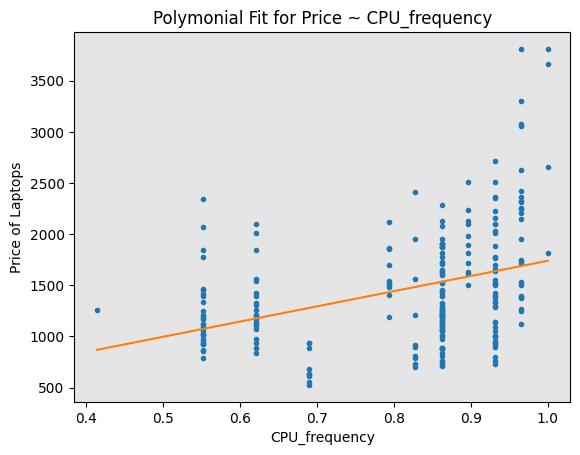

In [67]:
PlotPolly(p, X, Y, 'CPU_frequency')

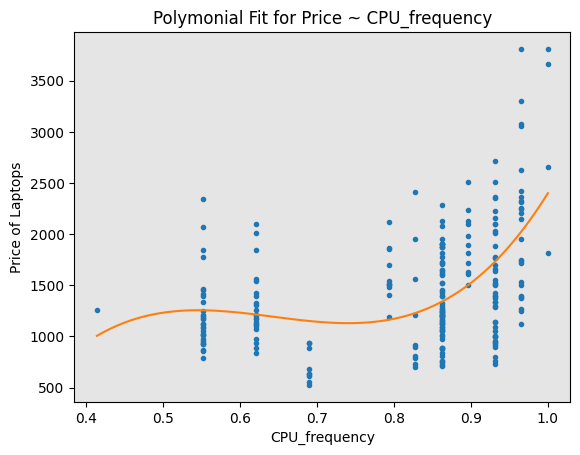

In [68]:
PlotPolly(p3, X, Y, 'CPU_frequency')

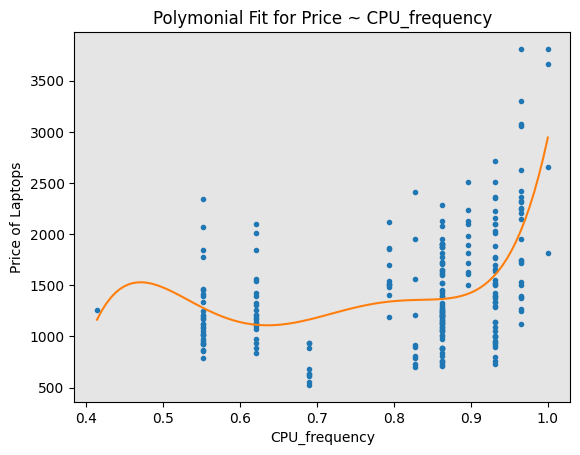

In [69]:
PlotPolly(p5, X, Y, 'CPU_frequency')

In [70]:
R2_squared_p = r2_score(Y, p(X))
print("The R-Squared for 1st degree polymonial is :", R2_squared_p)
print("The Mean Squared Error for the 1st degree polymonial is :", mean_squared_error(Y, p(X)))
R2_squared_p3 = r2_score(Y, p3(X))
print("The R-Squared for 3rd degree polymonial is :", R2_squared_p3)
print("The Mean Squared Error for the 3rd degree polymonial is :", mean_squared_error(Y, p3(X)))
R2_squared_p5 = r2_score(Y, p5(X))
print("The R-Squared for 5th degree polymonial is :", R2_squared_p5)
print("The Mean Squared Error for the 5th degree polymonial is :", mean_squared_error(Y, p5(X)))

The R-Squared for 1st degree polymonial is : 0.1344436321024326
The Mean Squared Error for the 1st degree polymonial is : 284583.4405868629
The R-Squared for 3rd degree polymonial is : 0.26692640796531086
The Mean Squared Error for the 3rd degree polymonial is : 241024.86303848776
The R-Squared for 5th degree polymonial is : 0.3030822706443337
The Mean Squared Error for the 5th degree polymonial is : 229137.29548055358


In [71]:
#Creating pipeline
Input = [('scale',StandardScaler()), ('polymonial',PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polymonial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [72]:
Z.astype('float')
pipe.fit(Z, Y)
ypipe = pipe.predict(Z)

In [73]:
print("The Mean Squared Error of the ypipe is :", mean_squared_error( Y, ypipe))
print('The R squared of the pipe is: ', r2_score(Y, ypipe))

The Mean Squared Error of the ypipe is : 121069.44852941176
The R squared of the pipe is:  0.6317690449016358


In [74]:
#Decison making to determine a Good Model Fit
print("MSE_SLR: ", mse_slr)
print("r2_score_slr: ", r2_score_slr)
print("mse_mlr :", mse_mlr)
print("r2_score_mlr :", r2_score_mlr)
print('MSE_polyfit: ',mean_squared_error( Y, ypipe) )
print('r2_score_polyfit :', r2_score(Y, ypipe))

MSE_SLR:  284583.4405868629
r2_score_slr:  0.1344436321024326
mse_mlr : 161680.57263893107
r2_score_mlr : 0.5082509055187374
MSE_polyfit:  121069.44852941176
r2_score_polyfit : 0.6317690449016358


In [75]:
from tqdm import tqdm
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures

In [76]:
df.head()

,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


In [78]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [79]:
df.head()

,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,Acer,4,2,1,5,14.000000,0.551724,8,256,3.52800,978,Low,False,True
1,Dell,3,1,1,3,15.598425,0.689655,4,256,4.85100,634,Low,True,False
2,Dell,3,1,1,7,15.598425,0.931034,8,256,4.85100,946,Low,True,False
3,Dell,4,2,1,5,13.299213,0.551724,8,128,2.69010,1244,Low,False,True
4,HP,4,2,1,7,15.598425,0.620690,8,256,4.21155,837,Low,True,False


In [80]:
#Dividing  the dataset 
y_data = df['Price']
x_data = df.drop('Price', axis=1)

In [82]:
# Splitting the dataset into training and testing data

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

print("The size of the training data:", x_train.shape[0])
print("The size of the testing data:", x_test.shape[0])

The size of the training data: 214
The size of the testing data: 24


In [83]:
# Creating a single Linear Regression for the training data
lre = LinearRegression()
lre.fit(x_train[['CPU_frequency']], y_train)

LinearRegression()

In [84]:
# Printing the Rˆ2 value

print('The Rˆ2 of the testing data is:',lre.score(x_test[['CPU_frequency']], y_test))
print("The Rˆ2 of the training data is:", lre.score(x_train[['CPU_frequency']], y_train))

The Rˆ2 of the testing data is: -0.06599437350393766
The Rˆ2 of the training data is: 0.14829792099817962


In [85]:
# Running a 4-fold cross validation and also finding the mean and std
Rcross = cross_val_score(lre, x_data[['CPU_frequency']], y_data, cv=4)
print("The mean of the folds is :", Rcross.mean(), 'with a standard deviation of', Rcross.std())

The mean of the folds is : -0.16109232388595096 with a standard deviation of 0.3849579786664708


In [95]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.50, random_state=0)

print("The number of training set:", x_train.shape[0])
print("The number of testing set:", x_test.shape[0])

The number of training set: 119
The number of testing set: 119


In [96]:
# Identifying the point of overfitting on the model and finding the right degree of polynomial

lr = LinearRegression()
Rsqu_test = []

order = [1, 2, 3, 4, 5]

for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['CPU_frequency']])
    
    x_test_pr = pr.fit_transform(x_test[['CPU_frequency']])
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))
    

Text(0.5, 1.0, 'Rˆ2 Using Test Data')

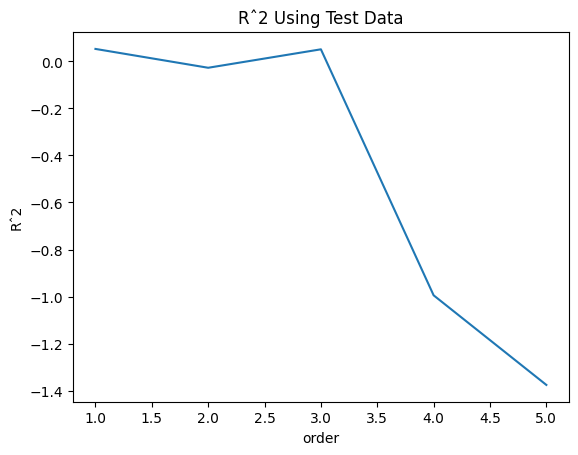

In [97]:
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('Rˆ2')
plt.title('Rˆ2 Using Test Data')


In [106]:
# Creating a polynomial degree of 2 

pr1 = PolynomialFeatures(degree=2)

x_test_pr1 = pr1.fit_transform(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']])

x_train_pr1 = pr1.fit_transform(x_train[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']])

In [108]:
Rsqu_test = []
Rsqu_train = []
Alpha = 10 * np.arange(0.001, 1, 0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha)
    RigeModel.fit(x_train_pr1, y_train)
    test_score, train_score = RigeModel.score(x_test_pr1, y_test), RigeModel.score(x_train_pr1, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score" : train_score})
    
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 999/999 [00:12<00:00, 78.03it/s, Test Score=0.422, Train Score=0.651]


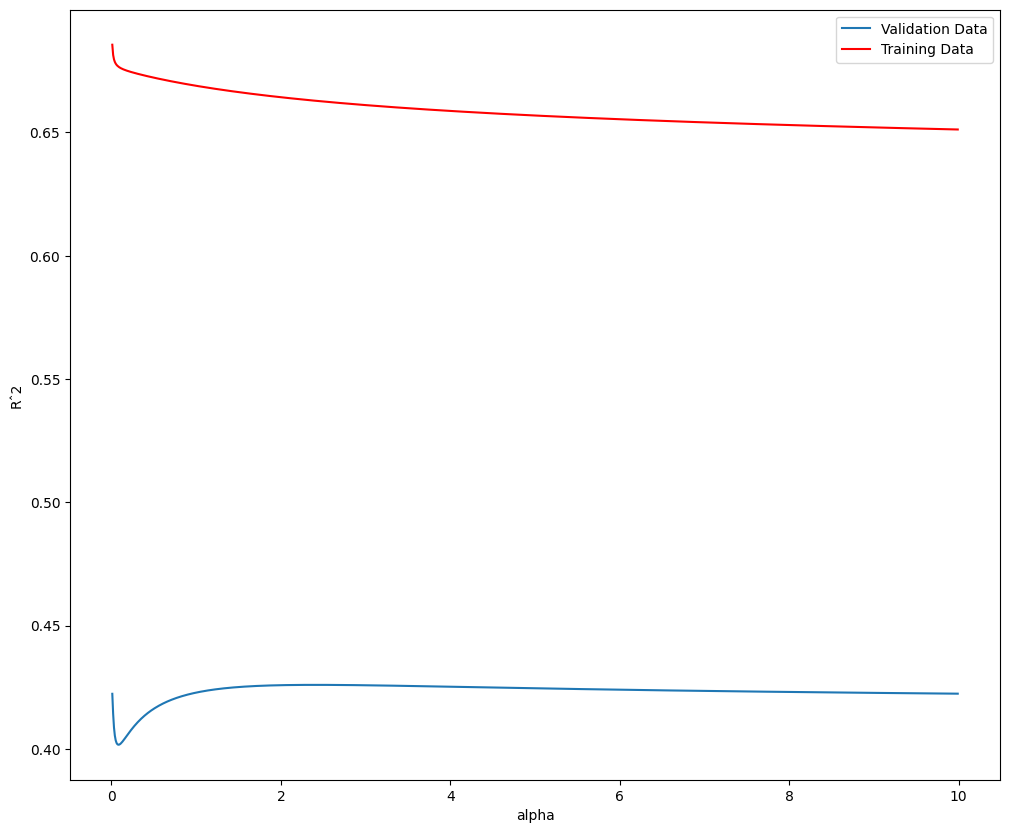

In [109]:
# Plotting the values of Rˆ2 for training and testing sets
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha, Rsqu_test, label = 'Validation Data')
plt.plot(Alpha, Rsqu_train, 'r', label='Training Data')
plt.xlabel('alpha')
plt.ylabel('Rˆ2')
plt.legend()

In [139]:
# Creating a dictionary of parameter values
parameters = [{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
parameters

[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [140]:
# Creating a Ridge regression object
RR = Ridge()
RR

Ridge()

In [141]:
#Creating a ridge grid search object
Grid = GridSearchCV(RR, parameters, cv=4)

In [142]:
# Fitting the model
Grid.fit(x_data[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                    10000, 100000]}])

In [143]:
#Finding the best parameter value on the validation data
BestRR = Grid.best_estimator_
BestRR

Ridge(alpha=0.0001)

In [144]:
BestRR.score(x_test[['CPU_frequency', 'RAM_GB', 'Storage_GB_SSD', 'CPU_core','OS','GPU', 'Category']], y_test)

0.4412383966156086